# Exploration

Create a file, explore.py, that contains the following functions for exploring your variables (features & target).

Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

Write a function, plot_categorical_and_continous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale

# acquire data and remove null values 
customers = wrangle.wrangle_telco()

X, y = split_scale.pull_X_y(customers)

# split into train and test
train, test, _, _ = split_scale.split_my_data(X, y, .8)

In [2]:
scaler, train_scaled, test_scale = split_scale.standard_scaler(train, test)

In [30]:
def plot_variable_pairs(dataframe, hue=None, kind="reg"):
    sns.pairplot(dataframe, hue=hue, kind=kind, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}}
)

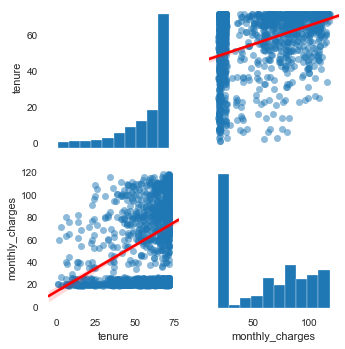

In [31]:
plot_variable_pairs(train)

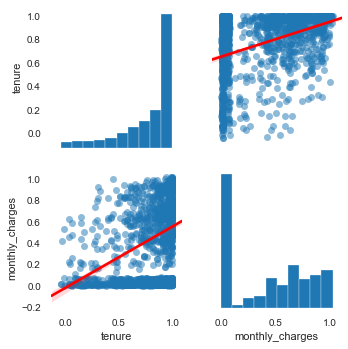

In [32]:
plot_variable_pairs(train_scaled)

In [6]:
scaler, train_scaled, test_scaled = split_scale.min_max_scaler(train, test)

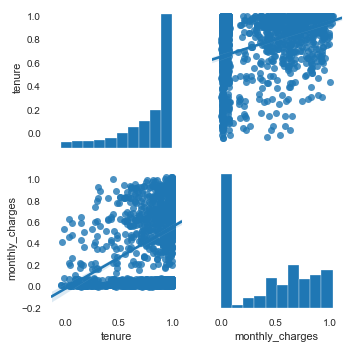

In [7]:
plot_variable_pairs(train_scaled)

In [8]:
customers.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years,tenure_years_bins,monthly_charges_bins
0,0013-SMEOE,109.70,71,7904.25,5.0,<=5,High
1,0014-BMAQU,84.65,63,5377.80,4.0,<=5,Medium
2,0016-QLJIS,90.45,65,5957.90,4.0,<=5,High
3,0017-DINOC,45.20,54,2460.55,3.0,1 > x <= 3,Low
4,0017-IUDMW,116.80,72,8456.75,5.0,<=5,High


In [9]:
def months_to_years(tenure_months, df):
    df["tenure_years"] = (df[tenure_months] / 12).round() - 1
    return df

In [10]:
months_to_years("tenure", customers)

,customer_id,monthly_charges,tenure,total_charges,tenure_years,tenure_years_bins,monthly_charges_bins
0,0013-SMEOE,109.70,71,7904.25,5.0,<=5,High
1,0014-BMAQU,84.65,63,5377.80,4.0,<=5,Medium
2,0016-QLJIS,90.45,65,5957.90,4.0,<=5,High
3,0017-DINOC,45.20,54,2460.55,3.0,1 > x <= 3,Low
4,0017-IUDMW,116.80,72,8456.75,5.0,<=5,High
...,...,...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40,5.0,<=5,Low
1691,9972-EWRJS,19.25,67,1372.90,5.0,<=5,Low
1692,9975-GPKZU,19.75,46,856.50,3.0,1 > x <= 3,Low
1693,9993-LHIEB,67.85,67,4627.65,5.0,<=5,Medium


In [11]:
train.columns[0]

'tenure'

In [12]:
def create_jointplot(dataframe):
    sns.jointplot(dataframe.columns[0],dataframe.columns[1], data=dataframe, kind="reg")

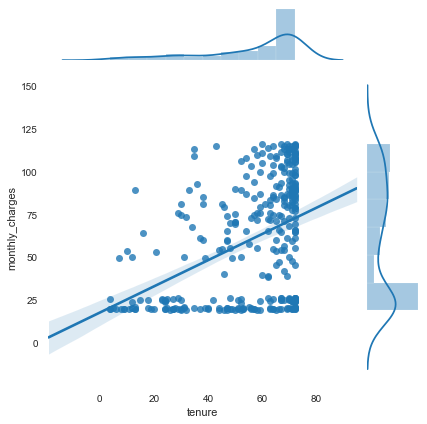

In [13]:
create_jointplot(test)

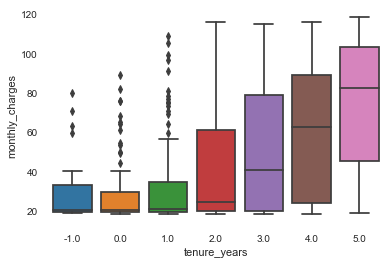

In [14]:
sns.boxplot("tenure_years", "monthly_charges", data=customers)

In [15]:
train.groupby("monthly_charges").count()

,tenure
monthly_charges,
18.40,1
18.55,1
18.70,2
18.80,2
18.95,2
...,...
117.60,1
118.20,1
118.60,1


In [16]:
def create_bins_monthly_charges(dataframe):
    dataframe["monthly_charges_bins"] = pd.cut(dataframe.monthly_charges, 3, labels=["low", "medium", "high"])

In [17]:
customers

,customer_id,monthly_charges,tenure,total_charges,tenure_years,tenure_years_bins,monthly_charges_bins
0,0013-SMEOE,109.70,71,7904.25,5.0,<=5,High
1,0014-BMAQU,84.65,63,5377.80,4.0,<=5,Medium
2,0016-QLJIS,90.45,65,5957.90,4.0,<=5,High
3,0017-DINOC,45.20,54,2460.55,3.0,1 > x <= 3,Low
4,0017-IUDMW,116.80,72,8456.75,5.0,<=5,High
...,...,...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40,5.0,<=5,Low
1691,9972-EWRJS,19.25,67,1372.90,5.0,<=5,Low
1692,9975-GPKZU,19.75,46,856.50,3.0,1 > x <= 3,Low
1693,9993-LHIEB,67.85,67,4627.65,5.0,<=5,Medium


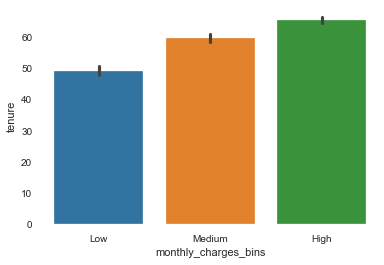

In [18]:
sns.barplot(x="monthly_charges_bins", y="tenure", data=customers)

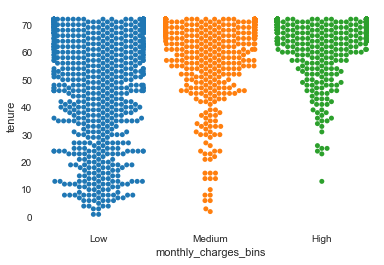

In [19]:
sns.swarmplot(x="monthly_charges_bins", y="tenure", data=customers)

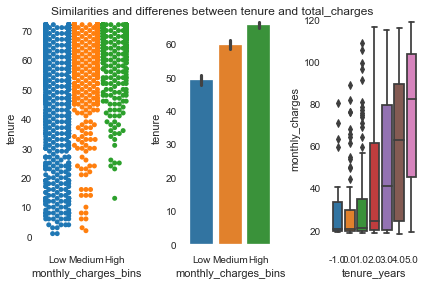

In [20]:
f,axes = plt.subplots(1,3)
sns.swarmplot(x="monthly_charges_bins", y="tenure", data=customers, ax=axes[0])
sns.barplot(x="monthly_charges_bins", y="tenure", data=customers, ax=axes[1])
sns.boxplot("tenure_years", "monthly_charges", data=customers, ax=axes[2])
plt.suptitle(f"Similarities and differenes between {customers.columns[2]} and {customers.columns[3]}")
f.tight_layout()

In [21]:
def plot_categorical_and_continous_vars(categorical_var, continuous_var, df):
    figure, axes = plt.subplots(1,3, figsize=(16,8))
    sns.boxplot(categorical_var, continuous_var, data=df, ax=axes[0])
    sns.barplot(x=categorical_var, y=continuous_var, data=df, ax=axes[1])
    sns.swarmplot(x=categorical_var, y=continuous_var, data=df, ax=axes[2])
    figure.tight_layout(pad = 2)
    plt.show()

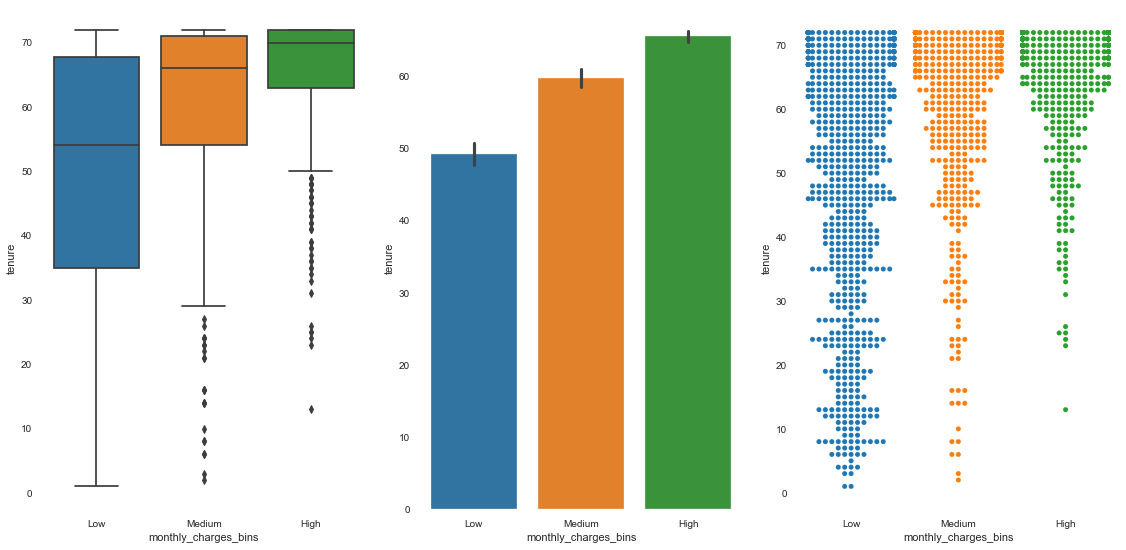

In [22]:
plot_categorical_and_continous_vars(customers.monthly_charges_bins, customers.tenure, customers)

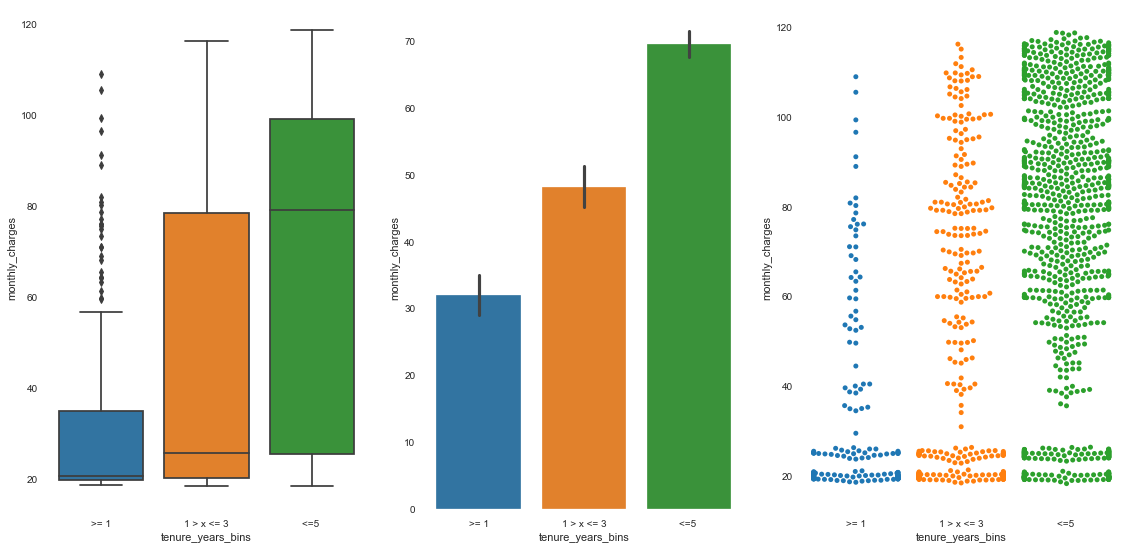

In [23]:
plot_categorical_and_continous_vars(customers.tenure_years_bins, customers.monthly_charges, customers)

In [24]:
customers["tenure_years_bins"]= pd.cut(customers.tenure_years, 3, labels=["1 year or less", "1 to 3 years", "3 to 5 years"])

In [25]:
customers

,customer_id,monthly_charges,tenure,total_charges,tenure_years,tenure_years_bins,monthly_charges_bins
0,0013-SMEOE,109.70,71,7904.25,5.0,3 to 5 years,High
1,0014-BMAQU,84.65,63,5377.80,4.0,3 to 5 years,Medium
2,0016-QLJIS,90.45,65,5957.90,4.0,3 to 5 years,High
3,0017-DINOC,45.20,54,2460.55,3.0,1 to 3 years,Low
4,0017-IUDMW,116.80,72,8456.75,5.0,3 to 5 years,High
...,...,...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40,5.0,3 to 5 years,Low
1691,9972-EWRJS,19.25,67,1372.90,5.0,3 to 5 years,Low
1692,9975-GPKZU,19.75,46,856.50,3.0,1 to 3 years,Low
1693,9993-LHIEB,67.85,67,4627.65,5.0,3 to 5 years,Medium


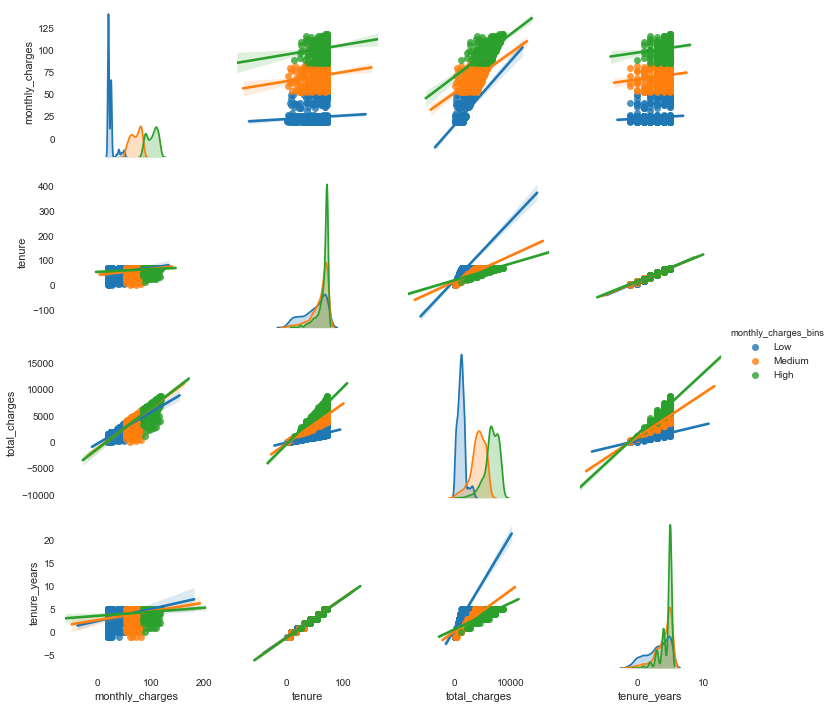

In [26]:
plot_variable_pairs(customers, hue="monthly_charges_bins")

In [64]:
def plot_categorical_and_continous_vars(categorical_var, continuous_var, df):
    figure, axes = plt.subplots(1,4, figsize=(16,8))
    
    sns.boxplot(categorical_var, continuous_var, data=df, ax=axes[3])
    sns.barplot(x=categorical_var, y=continuous_var, data=df, ax=axes[1])
    sns.swarmplot(x=categorical_var, y=continuous_var, data=df, ax=axes[2])
    sns.countplot(x=categorical_var, data=df, ax=axes[0])
    figure.tight_layout()
    plt.show()

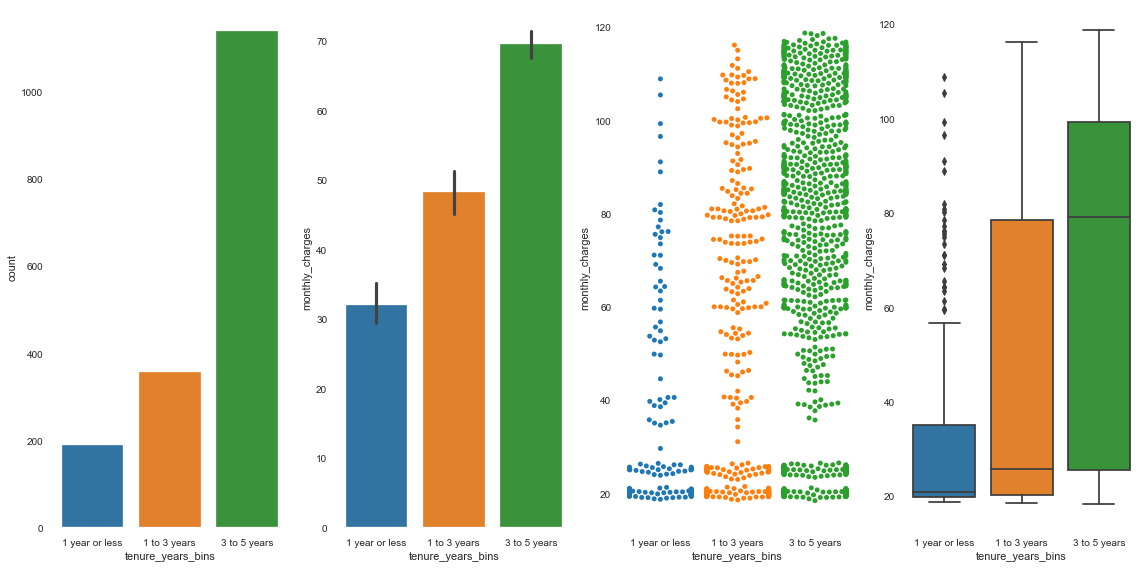

In [67]:
plot_categorical_and_continous_vars(customers.tenure_years_bins, customers.monthly_charges, customers)